# Univariate Linear Regression

$ Hypothesis:  $ 
$ {h}_{\Theta} = {\Theta}_0 + {\Theta}_1  x $

$ Cost function: $
$ J_{\Theta} = \frac {1}{2m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})^2 $

$ Gradient descent: $
$ {\Theta}_j:= {\Theta}_j - {\alpha}\frac {1}{m} \sum_{i=1}^{m} (h_{\Theta_i}(x^{(i)}) - y^{(i)})x_j $

${\Theta_j}:={\Theta}_j - {\alpha} \frac {\partial J({\Theta}_j)} {\partial {\Theta}_j} $ simutaniouse updat 

$ {\Theta_j}$ in univariable linear case are ${\Theta_1}$ & ${\Theta_0}$

$ \frac {\partial J({\Theta}_j)} {\partial {\Theta}_j}  = \frac {\partial }  {\partial {\Theta_j}} \frac {1}{2m} \sum_{i=1}^{m} (h_{\Theta_j}(x)^{(i)} - y^{(i)})^2  =  \frac {1}{m} \sum_{i=1}^{m} (h_{\Theta_j}(x^{(i)}) - y^{(i)})x_j $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#open file
uni_df = pd.read_csv('./Uni_linear.txt', encoding='utf-8', header=None)
uni_df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
# check data statics
uni_df.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


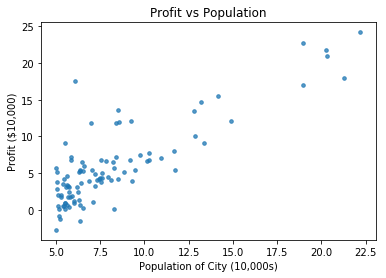

In [4]:
plt.scatter(uni_df[0], uni_df[1], alpha= 0.75, s=13)
plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit ($10,000)')
plt.title('Profit vs Population');

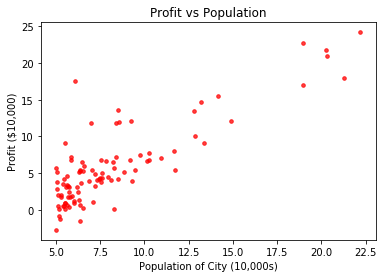

In [5]:
# By Datafram plot method
uni_df.plot(kind='scatter', x = 0, y = 1, color='R', alpha = 0.75, s=13)
plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit ($10,000)')
plt.title('Profit vs Population');

In [6]:
def CostFunition(X, y, theta):
    return np.sum((np.dot(X, theta) - y )**2) / 2 / len(y)

def gradientDescent(X, y, theta, alpha, iter_num):
    theta_list = []
    cost_list = []
    for i in range(iter_num):
        #theta = theta - (alpha * np.array([[1 / y.shape[0] *np.sum(np.dot(X, theta) - y)],
        #                                  [1 / y.shape[0] *np.sum((np.dot(X, theta) - y) * X[:, 1:2])]]))
        theta = theta- alpha * 1/y.shape[0] * np.dot(X.T, (np.dot(X, theta) - y.reshape((y.shape[0], 1))))
        theta_list.append(theta)
        #cost_list.append(np.sum((np.dot(X, theta) - y)**2) / y.shape[0])
        cost_list.append(CostFunition(X, y, theta))
    return theta_list, cost_list

In [7]:
#initial data
#np.random.seed(0)
uni_ary = uni_df.values
X = np.concatenate((np.ones((uni_ary.shape[0], 1)), uni_ary[:, 0:1]), axis=1) # add constant 1 for theta0
y = uni_ary[:, 1:2]
#theda = np.random.randint(1, 10, size= (2, 1))
theda = np.zeros((2, 1))
#theda = np.random.randint(-5, 5, size=(2, 1))
CostFunition(X, y ,theda)

32.072733877455676

# check Cost Function shape (TBD)

In [8]:
from mpl_toolkits.mplot3d import Axes3D

In [9]:
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-4, 4, 100)
Jtheta = np.zeros((len(theta0), len(theta1)))

for idx_i, i in enumerate(theta0):
    for idx_j, j in enumerate(theta1):
        Jtheta[idx_i, idx_j] = CostFunition(X, y, np.array([[i], [j]]))

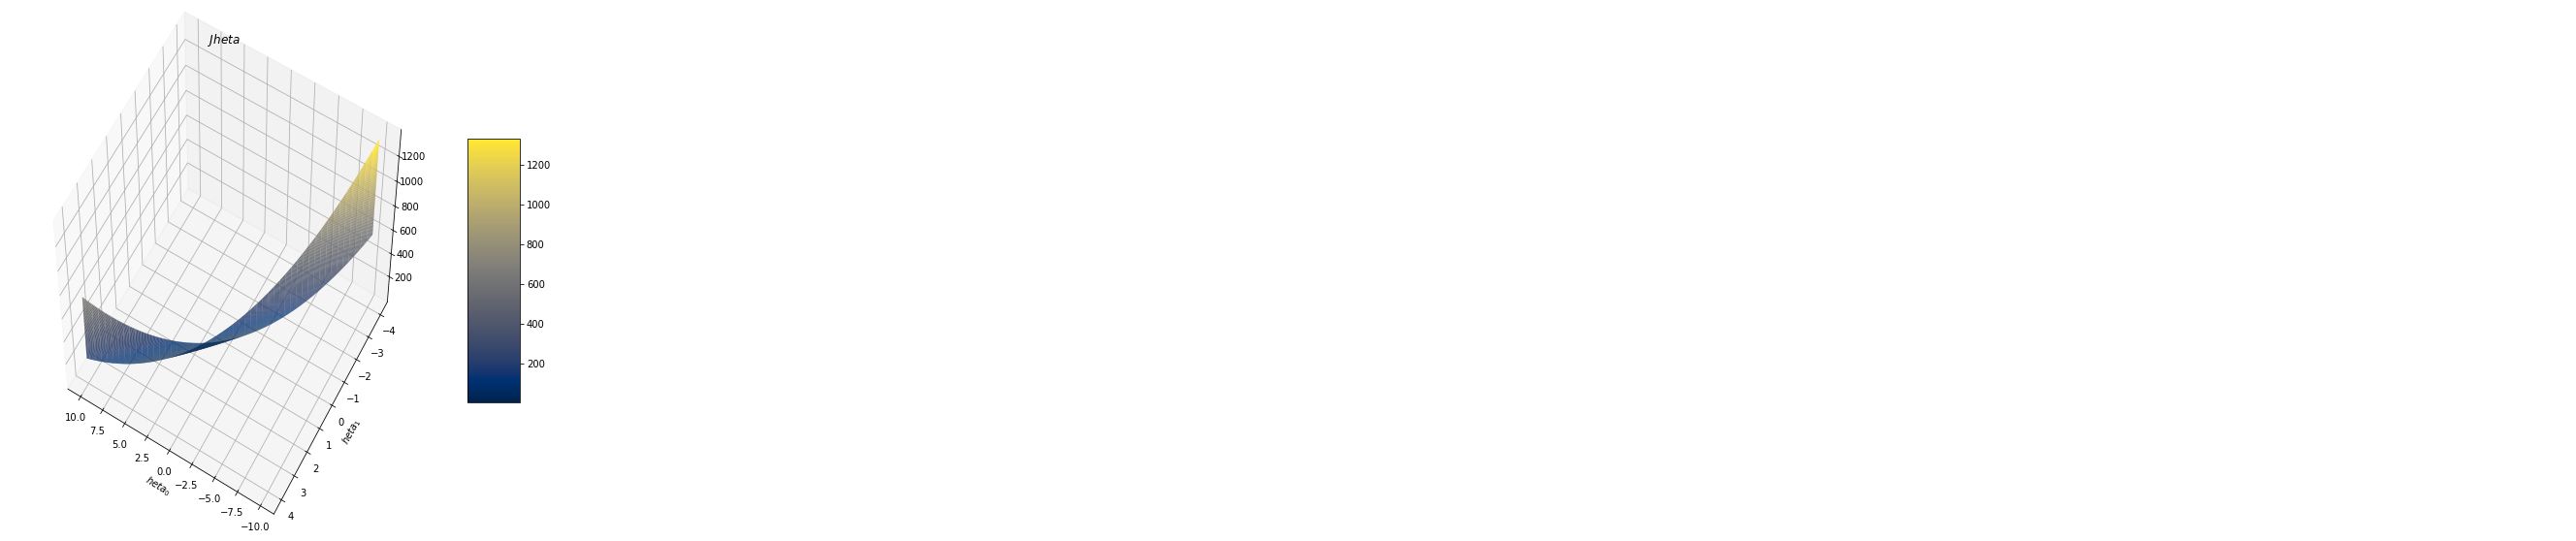

In [10]:
f2 = plt.figure(figsize=(10, 10))
ax = f2.add_subplot(111, projection='3d')
surf = ax.plot_surface(theta0, theta1, Jtheta, cmap=plt.cm.cividis)
f2.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$\theta_0$')
ax.set_ylabel('$\theta_1$')
ax.set_title('$J{\theta}$')

ax.view_init(55, 120)

coeff: [array([[-3.6283685 ],
       [ 1.16616917]]), array([[-3.62885054],
       [ 1.1662176 ]]), array([[-3.6293317 ],
       [ 1.16626593]]), array([[-3.62981201],
       [ 1.16631419]]), array([[-3.63029144],
       [ 1.16636235]])]
cost_list: [4.48348154808312, 4.483458098818883, 4.483434734017542, 4.483411453374869, 4.483388256587726]


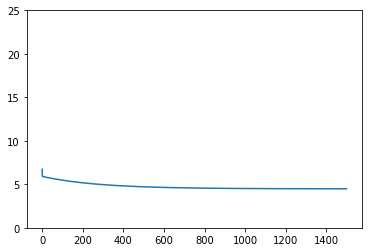

In [11]:
coeff_list, cost_list = gradientDescent(X, y, theda, 0.01, 1500)
plt.plot(np.arange(len(cost_list)), cost_list)
plt.ylim([0, 25])
print('coeff:', coeff_list[-5:])
print('cost_list:', cost_list[-5:])

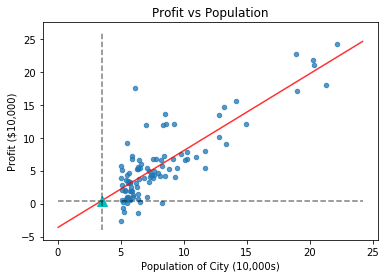

In [12]:
plt.scatter(uni_df[0], uni_df[1], alpha= 0.75, s=20)
plt.plot(np.linspace(uni_df[0].min()-5 , uni_df[0].max()+ 2, 100), 
         np.linspace(uni_df[0].min()-5 , uni_df[0].max()+ 2, 100) * coeff_list[-1][1] + coeff_list[-1][0], 
         color='R', alpha = 0.8)
#plt.scatter(3.5, 3.5*coeff_list[-1][1] + coeff_list[-1][0], '*', s=20)
plt.plot(3.5, 3.5*coeff_list[-1][1] + coeff_list[-1][0], 'c^', markersize = 10)
plt.plot(np.linspace(uni_df[0].min()-5 , uni_df[0].max()+ 2, 10),
          (3.5*coeff_list[-1][1] + coeff_list[-1][0])*np.ones((10)),'k--', alpha = 0.5)
plt.plot(3.5 * np.ones((5)), np.linspace(-4, 25+1, 5),'k--', alpha = 0.5)
plt.xticks(np.arange(0, 25+1, 5))
plt.yticks(np.arange(-5, 25+1, 5))
plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit ($10,000)')
plt.title('Profit vs Population');

In [13]:
def predict(x, theta):
    return np.dot(x, theta) * 10000

In [14]:
# population 35000
predict(np.array([1, 3.5]), coeff_list[-1])

array([4519.7678677])

# Normal Equation

$X{\Theta} = y$

$X^{T}X{\Theta} = X^{T}y$

$(X^{T}X)^{-1}(X^{T}X){\Theta} = (X^{T}X)^{-1}X^{T}y$

${\Theta} = (X^{T}X)^{-1}X^{T}y$


In [15]:
theta_normal = (np.linalg.inv(np.dot(X.T, X)).dot(X.T)).dot(y)

In [16]:
print('Linear Regression By Normal_quation:\n',theta_normal,'\nBy GradientDescent:\n', coeff_list[-1])

Linear Regression By Normal_quation:
 [[-3.89578088]
 [ 1.19303364]] 
By GradientDescent:
 [[-3.63029144]
 [ 1.16636235]]


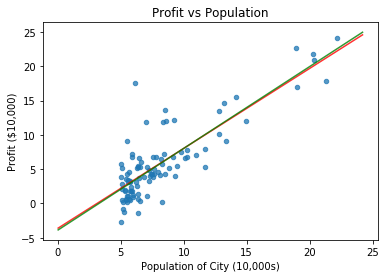

In [17]:
#compare gradient descent and normal equation
plt.scatter(uni_df[0], uni_df[1], alpha= 0.75, s=20)
plt.plot(np.linspace(uni_df[0].min()-5 , uni_df[0].max()+ 2, 100), 
         np.linspace(uni_df[0].min()-5 , uni_df[0].max()+ 2, 100) * coeff_list[-1][1] + coeff_list[-1][0], 
         color='R', alpha = 0.8)

plt.plot(np.linspace(uni_df[0].min()-5 , uni_df[0].max()+ 2, 100), 
         np.linspace(uni_df[0].min()-5 , uni_df[0].max()+ 2, 100) * theta_normal[1] + theta_normal[0], 
         color='G', alpha = 0.8)

plt.xticks(np.arange(0, 25+1, 5))
plt.yticks(np.arange(-5, 25+1, 5))
plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit ($10,000)')
plt.title('Profit vs Population');

# Multi-variate Linear Regression

In [18]:
muti_df = pd.read_csv('./Multi_linear.txt', encoding='utf-8', header=None)
muti_df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [19]:
muti_df.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


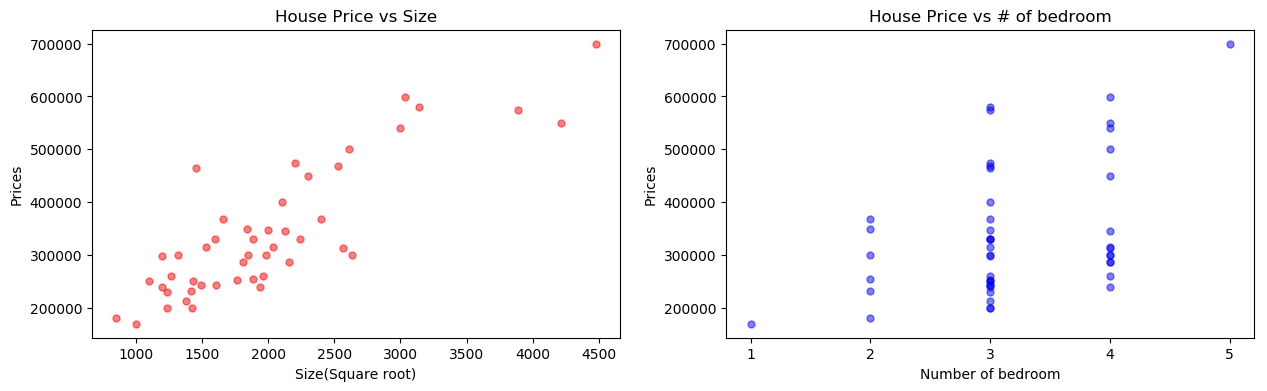

In [20]:
plt.style.use('default')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.scatter(muti_df[0], muti_df[2], color='R', s=25, alpha = 0.5)
ax1.set_ylabel('Prices')
ax1.set_xlabel('Size(Square root)')
ax1.set_title('House Price vs Size')
ax2.scatter(muti_df[1], muti_df[2], color='B', s=25, alpha = 0.5)
ax2.set_ylabel('Prices')
ax2.set_xlabel('Number of bedroom')
ax2.set_title('House Price vs # of bedroom')
ax2.set_xticks(np.arange(1, 5+1, 1));

In [21]:
# Feature scaling for uniform cost function and faster gradient descent (Z-score)
def featureNormalization(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_norm = (X - X_mean) / X_std
    return X_norm, X_mean, X_std

In [22]:
muti_num = muti_df.values
X2 = muti_num[:, 0:2]
X2, X2_mean, X2_std = featureNormalization(X2)
X2 = np.concatenate((np.ones((X2.shape[0], 1)), X2), axis = 1)
y2 = muti_num[:, -1:]
theta2 = np.zeros((3, 1))

In [23]:
CostFunition(X2, y2, theta2)

65591548106.45744

In [24]:
coeff_list2, cost_list2 = gradientDescent(X2, y2, theta2, 0.1, 400)

(1000, 55829508936.24602)

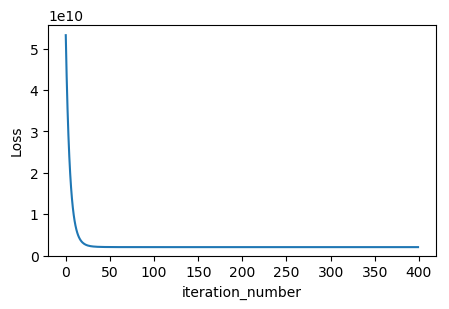

In [25]:
f3 = plt.figure(figsize=(5, 3))
ax3 = f3.add_subplot(111)
ax3.plot(cost_list2)
ax3.set_xlabel('iteration_number')
ax3.set_ylabel('Loss')
ax3.set_ylim(1000)

In [26]:
def predict2(x, theta):
    return np.dot(x, theta)

In [27]:
np.argmin(cost_list2) 

392

In [28]:
coeff_list2[np.argmin(cost_list2)]

array([[340412.65957447],
       [109447.79525934],
       [ -6578.35364386]])

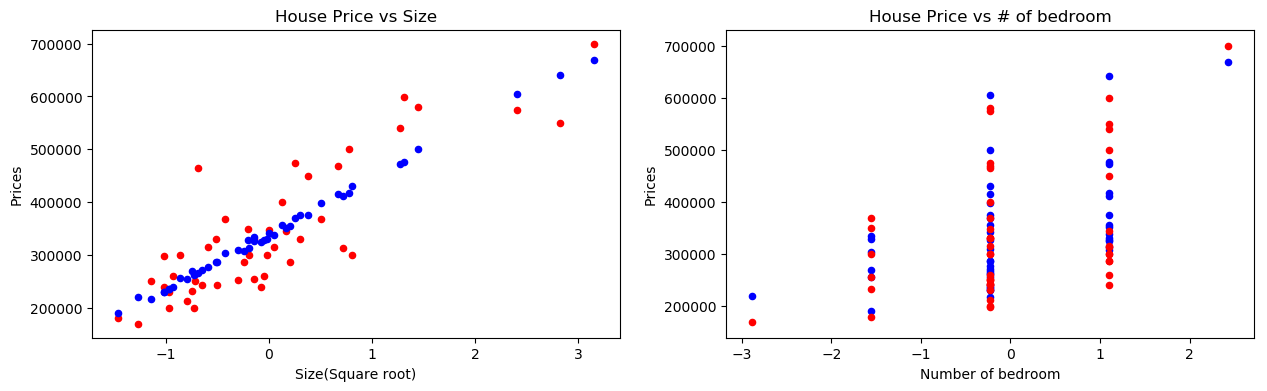

In [29]:
f4 = plt.figure(figsize=(15, 4))
ax4 = f4.add_subplot(121)
ax4.scatter(X2[:, 1:2], y2, s=20, color='R')
ax4.scatter(X2[:, 1:2], predict2(X2, coeff_list2[np.argmin(cost_list2)]), s=20, color ='B')
ax4.set_ylabel('Prices')
ax4.set_xlabel('Size(Square root)')
ax4.set_title('House Price vs Size')
ax5 = f4.add_subplot(122)
ax5.scatter(X2[:, 2:3], predict2(X2, coeff_list2[np.argmin(cost_list2)]), s=20, color ='B')
ax5.scatter(X2[:, 2:3], y2, s=20, color='R')
ax5.set_ylabel('Prices')
ax5.set_xlabel('Number of bedroom')
ax5.set_title('House Price vs # of bedroom');

In [30]:
# example For size of house = 1650, Number of bedroom = 3
dataset_mean = np.array([[muti_df.iloc[:, 0].mean(), muti_df.iloc[:, 1].mean()]])
dataset_std  = np.array([[muti_df.iloc[:, 0].std(),  muti_df.iloc[:, 1].std() ]])
X2_test = np.array([[1650, 3]])
X2_norm = (X2_test - dataset_mean) / dataset_std
X2_norm_1 = np.concatenate((np.ones((X2_norm.shape[0], 1)), X2_norm), axis=1)
y2_result = predict2(X2_norm_1, coeff_list2[np.argmin(cost_list2)])
y2_result

array([[293587.69514492]])

In [31]:
#reference original article
predict2(np.array([1, 1, -1]), coeff_list2[np.argmin(cost_list2)])

array([456438.80847768])

# Normal Equation for mutivariate linear regression reference
$X{\Theta} = y$

$X^{T}X{\Theta} = X^{T}y$

$(X^{T}X)^{-1}(X^{T}X){\Theta} = (X^{T}X)^{-1}X^{T}y$

${\Theta} = (X^{T}X)^{-1}X^{T}y$


In [32]:
theta3 = (np.linalg.inv(np.dot(X2.T, X2)).dot(X2.T)).dot(y2)
theta3, coeff_list2[np.argmin(cost_list2)]

(array([[340412.65957447],
        [109447.79646964],
        [ -6578.35485416]]), array([[340412.65957447],
        [109447.79525934],
        [ -6578.35364386]]))